In [1]:
import sys
sys.path.append('../src')

import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/labelled_data.csv')
df['label'] = df['label'].replace({
    0: "Natural Sciences",
    1: "Social Sciences",
    2: "Engineering",
    3: "Culture",
    4: "Other"
})
df.head()

,Unnamed: 0,title,content,label
0,0,Melocalamus scandens,Melocalamus scandens là một loài thực vật có h...,Natural Sciences
1,1,Paleauletobius silenus,Paleauletobius silenus là một loài bọ cánh cứn...,Natural Sciences
2,2,Zoodes hirsutus,Zoodes hirsutus là một loài bọ cánh cứng trong...,Natural Sciences
3,3,Quốc kỳ Argentina,Quốc kỳ Argentina ( tiếng Tây Ban Nha : Bander...,Culture
4,4,Dundahera,Dundahera là một thị trấn thống kê ( census to...,Social Sciences


## Label frequency

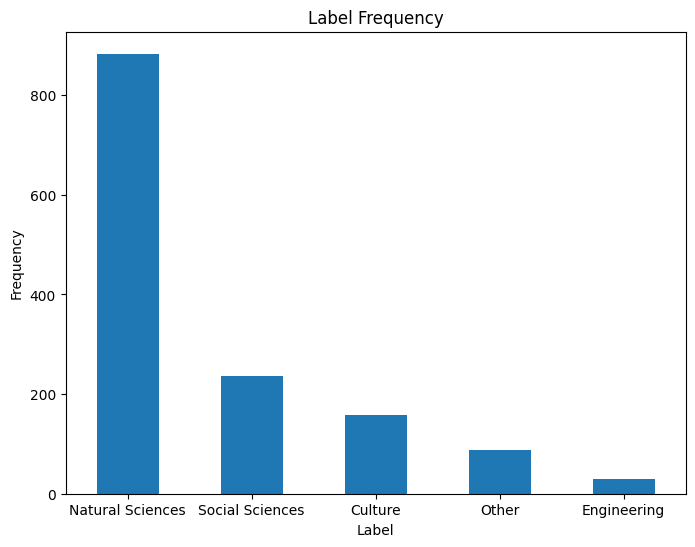

In [5]:
plt.figure(figsize=(8, 6))
df['label'].value_counts().plot(kind='bar')
plt.title('Label Frequency')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0) 
plt.show()